In [ ]:
!wget http://download.inep.gov.br/microdados/microdados_enem2014.zip


--2020-05-29 21:00:10--  http://download.inep.gov.br/microdados/microdados_enem2014.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1200278947 (1.1G) [application/zip]
Saving to: ‘microdados_enem2014.zip’

microdados_enem2014 100%[===================>]   1.12G  1.39MB/s    in 14m 40s 

2020-05-29 21:14:50 (1.30 MB/s) - ‘microdados_enem2014.zip’ saved [1200278947/1200278947]



In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow e tf.keras
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Deixa as imagens numa escala de 0 a 1 para que sejam processadas da mesma maneira
train_images = train_images / 255.0
test_images = test_images / 255.0


# Montando as camadas da rede neural
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Essa camada não tem paramêtros para aprender; ela só reformata os dados.
    keras.layers.Dense(128, activation='relu'), # Camada totalmente conectada com 128 nós (ou neurônios).
    keras.layers.Dense(10, activation='softmax') # É uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contem um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.
])

model.compile(optimizer='adam', # Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.
              loss=tf.keras.losses.sparse_categorical_crossentropy, # Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para direção certa.
              metrics=['accuracy']) # usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.

model.fit(train_images, train_labels, epochs=10) # Encaixa o modelo no conjunto de treinamento

# Executa o modelo com o conjuto de teste para avaliar a acuracia
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)
predictions[0]
print(np.argmax(predictions[0])) # Mostra qual a predição que o modelo fez para a imagem de posição 0
print(test_labels[0]) # Mostra o real label da imagem de posição 0

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)


# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


np.argmax(predictions_single[0])


In [ ]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds

# Carrega e separa os dados
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

# train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
# train_examples_batch
# train_labels_batch

#Baixa um modelo de incorporação de texto pré-treinado
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
"""
Primeira camada: Mapeada a frase dentro de um vetor de incorporação, Dividindo-a em tokens
Segunda camada: Esse vetor de saída de comprimento fixo é canalizado através de uma camada totalmente conectada com 16 unidades ocultas.
Terceira camada: Camada com um simples nó de saida que usa a função de ativação sigmoid
"""
model = tf.keras.Sequential([
  hub_layer,
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Treina o modelo pegando por vez 512 amostra
# Monitora a perda e a precisão nas 10000 amostras do conjunto de validação
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))


Epoch 1/20
30/30 [==============================] - 5s 176ms/step - loss: 1.7586 - accuracy: 0.5013 - val_loss: 0.7781 - val_accuracy: 0.4978
Epoch 2/20
30/30 [==============================] - 5s 161ms/step - loss: 0.7533 - accuracy: 0.5083 - val_loss: 0.7071 - val_accuracy: 0.5330
Epoch 3/20
30/30 [==============================] - 5s 166ms/step - loss: 0.6782 - accuracy: 0.5615 - val_loss: 0.6637 - val_accuracy: 0.5789
Epoch 4/20
30/30 [==============================] - 5s 170ms/step - loss: 0.6373 - accuracy: 0.6055 - val_loss: 0.6313 - val_accuracy: 0.6079
Epoch 5/20
30/30 [==============================] - 5s 167ms/step - loss: 0.6042 - accuracy: 0.6391 - val_loss: 0.6034 - val_accuracy: 0.6433
Epoch 6/20
30/30 [==============================] - 5s 172ms/step - loss: 0.5734 - accuracy: 0.6708 - val_loss: 0.5780 - val_accuracy: 0.6700
Epoch 7/20
30/30 [==============================] - 5s 172ms/step - loss: 0.5466 - accuracy: 0.6982 - val_loss: 0.5530 - val_accuracy: 0.6954
Epoch 

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePBV6K4/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePBV6K4/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompletePBV6K4/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.
Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."
Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
___________________________________________________

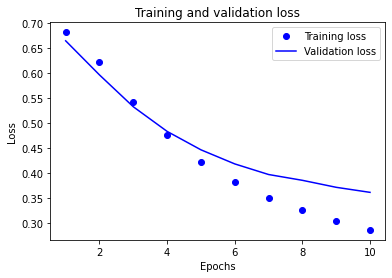

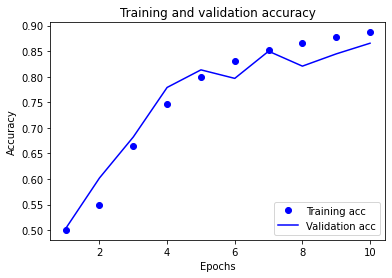

In [ ]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

encoder = info.features['text'].encoder
sample_string = 'Hello TensorFlow.'
encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))
original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))
assert original_string == sample_string

BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, padded_shapes=([None],[])))

test_batches = (
    test_data
    .padded_batch(32, padded_shapes=([None],[])))

for train_example, train_label in train_data.take(1):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())

model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1)])

model.summary()

model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

history_dict = history.history
history_dict.keys()

###### Plotagem do resultado do modelo

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Outro plote
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()




Epoch: 0, loss:554.0240,  mae:22.3090,  mse:554.0240,  val_loss:535.6445,  val_mae:21.8775,  val_mse:535.6445,  
..........................................................3/3 - 0s - loss: 5.8622 - mae: 1.8880 - mse: 5.8622
Testing set Mean Abs Error:  1.89 MPG


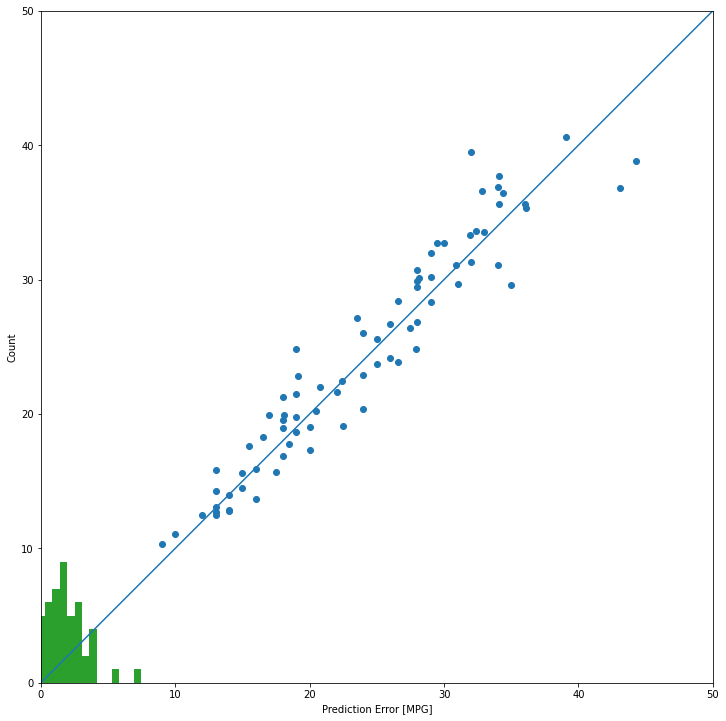

In [ ]:
!pip install -q seaborn
!pip install -q git+https://github.com/tensorflow/docs
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

dataset.isna().sum()

dataset = dataset.dropna()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

# model = build_model()

# example_batch = normed_train_data[:10]
# example_result = model.predict(example_batch)

# EPOCHS = 1000

# history = model.fit(
#   normed_train_data, train_labels,
#   epochs=EPOCHS, validation_split = 0.2, verbose=0,
#   callbacks=[tfdocs.modeling.EpochDots()])

# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

# plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

# plotter.plot({'Basic': history}, metric = "mae")
# plt.ylim([0, 10])
# plt.ylabel('MAE [MPG]')

# plotter.plot({'Basic': history}, metric = "mse")
# plt.ylim([0, 20])
# plt.ylabel('MSE [MPG^2]')



model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow e tf.keras
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(train_labels[predicted_label],
                                100*np.max(predictions_array),
                                train_labels[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



train_images = train_images / 255.0

test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

predictions[0]
print(np.argmax(predictions[0]))
print(test_labels[0])

predictions[10]
print(np.argmax(predictions[10]))
print(test_labels[10])


predictions[20]
print(np.argmax(predictions[20]))
print(test_labels[20])

Epoch 1/10


InvalidArgumentError: ignored